In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the dataset
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')

In [26]:
# Quick look at the data
print(df.head())

       City  Year     Sport Discipline           Event  \
0  Montreal  1976  Aquatics     Diving  3m springboard   
1  Montreal  1976  Aquatics     Diving  3m springboard   
2  Montreal  1976  Aquatics     Diving  3m springboard   
3  Montreal  1976  Aquatics     Diving  3m springboard   
4  Montreal  1976  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15316 entries, 0 to 15315
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15316 non-null  object
 1   Year          15316 non-null  int64 
 2   Sport         15316 non-null  object
 3   Discipline    15316 non-null  object
 4   Event         15316 non-null  object
 5   Athlete       15316 non-null  object
 6   Gender        15316 non-null  object
 7   Country_Code  15316 non-null  object
 8   Country       15316 non-null  object
 9   Event_gender  15316 non-null  object
 10  Medal         15316 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB
None


In [28]:
# Check for null values
print(df.isnull().sum())

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64


In [29]:
# Drop rows with all nulls
df.dropna(how='all', inplace=True)

In [30]:
# Convert 'Year' to integer type
df['Year'] = df['Year'].astype(int)

In [31]:
# Drop irrelevant columns
df.drop(['Event_gender', 'Country_Code'], axis=1, inplace=True)

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15316 entries, 0 to 15315
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        15316 non-null  object
 1   Year        15316 non-null  int32 
 2   Sport       15316 non-null  object
 3   Discipline  15316 non-null  object
 4   Event       15316 non-null  object
 5   Athlete     15316 non-null  object
 6   Gender      15316 non-null  object
 7   Country     15316 non-null  object
 8   Medal       15316 non-null  object
dtypes: int32(1), object(8)
memory usage: 1017.2+ KB
None


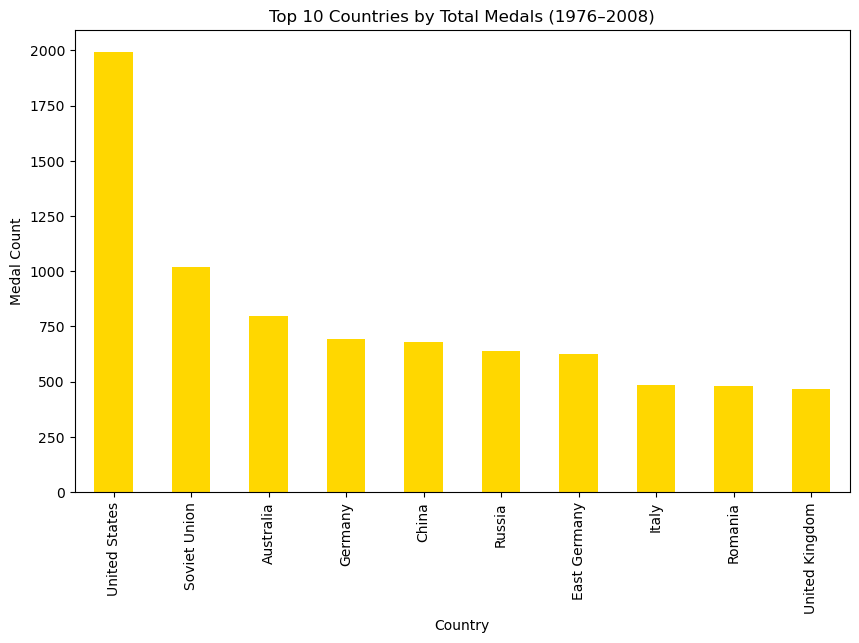

In [33]:
# Total Medals by Country
medals_by_country = df.groupby('Country')['Medal'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
medals_by_country.plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Total Medals (1976–2008)")
plt.xlabel("Country")
plt.ylabel("Medal Count")
plt.show()


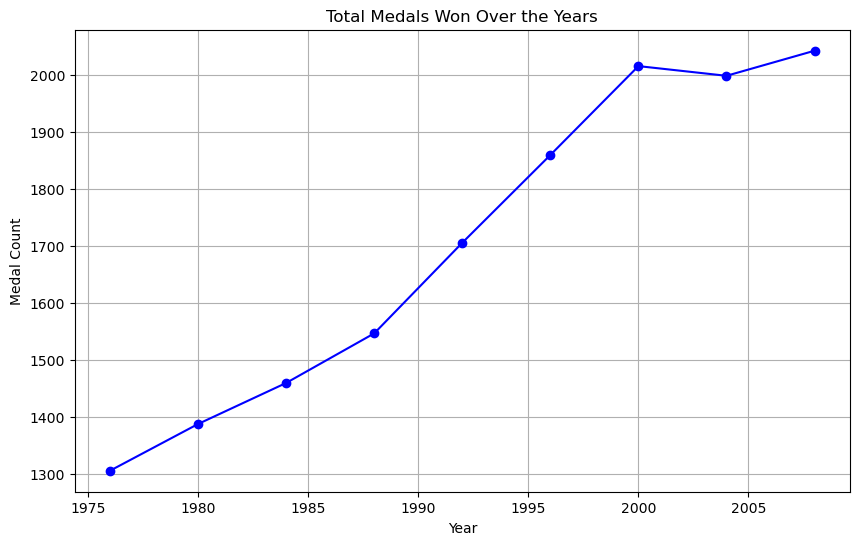

In [34]:
# Medals Over the Years
medals_over_years = df.groupby('Year')['Medal'].count()

plt.figure(figsize=(10,6))
plt.plot(medals_over_years.index, medals_over_years.values, marker='o', linestyle='-', color='blue')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Medal Count")
plt.grid(True)
plt.show()

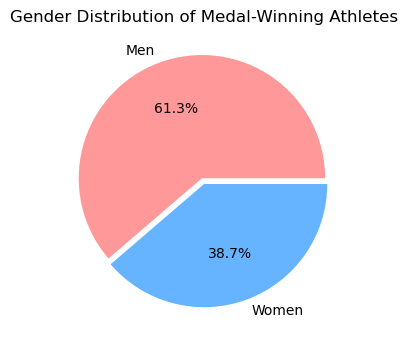

In [35]:
# Gender Distribution
gender_distribution = df['Gender'].value_counts()

plt.figure(figsize=(6,4))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], colors=['#ff9999','#66b3ff'])
plt.title("Gender Distribution of Medal-Winning Athletes")
plt.ylabel("")
plt.show()

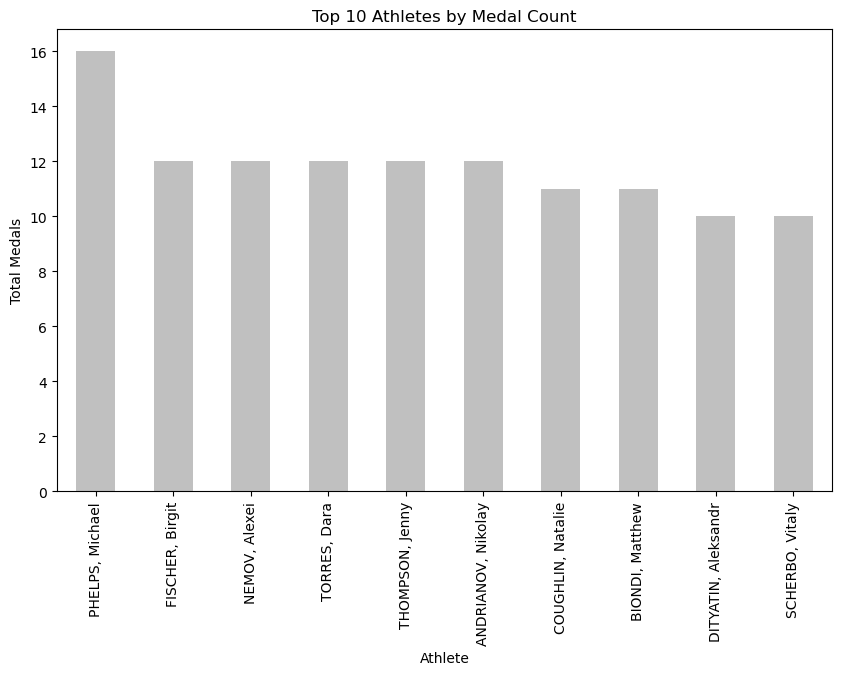

In [36]:
# Top Athletes
top_athletes = df.groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_athletes.plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a sample DataFrame (replace this with your actual data loading, e.g., pd.read_csv('your_file.csv'))
data = {
    'Country': ['USA', 'China', 'Japan', 'UK', 'Germany', 'USA', 'China'],
    'Sport': ['Swimming', 'Gymnastics', 'Judo', 'Athletics', 'Swimming', 'Athletics', 'Judo'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Medal': ['Gold', 'Silver', 'Bronze', None, 'Gold', None, 'Silver']
}
df = pd.DataFrame(data)

# Handle missing values in 'Medal' (assume None or NaN means no medal, map to 0)
df['Medal'] = df['Medal'].fillna(0)  # Replace NaN/None with 0 (no medal)

# Label Encoding for categorical features
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Sport'] = le.fit_transform(df['Sport'])
df['Gender'] = le.fit_transform(df['Gender'])

# Map 'Medal' column: Gold, Silver, Bronze to 1; 0 remains 0 (no medal)
df['Medal'] = df['Medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1, 0: 0})

# Features & target
X = df[['Country', 'Sport', 'Gender']]
y = df['Medal']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optional: Train a logistic regression model to verify the code works
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

